In [1]:
!pip install torchtext==0.8.1
!pip install -Uqq                                         fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 7.0MB 9.6MB/s 
     |████████████████████████████████| 776.8MB 21kB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchtext 0.9.1
    Uninstalling torchtext-0.9.1:
      Successfully uninstalled torchtext-0.9.1
     |████████████████████████████████| 727kB 15.7MB/s 
     |████████████████████████████████| 194kB 31.7MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 1.2MB 28.2MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 12.8MB 67.1MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
Mounted at /content/gdrive


In [2]:
from fastai.vision.widgets import *
from fastbook import *
from fastai.vision import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/Projekt/Dataset Kleid länger"

In [5]:
path

'/content/drive/MyDrive/Projekt/Dataset Kleid länger'

In [ ]:
batch_tfms = [*aug_transforms(size=224, max_warp=.9), Normalize.from_stats(*imagenet_stats)]
item_tfms = RandomResizedCrop(224, min_scale=0.75, ratio=(1.,1.))
bs=64

In [9]:
batch_tfms = [*aug_transforms(size=224, mult=2), Normalize.from_stats(*imagenet_stats)]
item_tfms= RandomResizedCrop(224, min_scale=0.7)


In [10]:
  dblock = DataBlock( 
              blocks=(ImageBlock, CategoryBlock), 
               get_items=get_image_files, 
              splitter=RandomSplitter(valid_pct=0.2, seed=42),
               get_y=parent_label,
      item_tfms= item_tfms, 
      batch_tfms = batch_tfms,
 
)
  dls = dblock.dataloaders(path ,bs= 32)

In [ ]:

len(dls.train),len(dls.valid)

(133, 34)

In [11]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [8]:
learn.fine_tune(12)

epoch,train_loss,valid_loss,accuracy,time
0,1.440375,0.841883,0.696913,09:07


epoch,train_loss,valid_loss,accuracy,time
0,0.833420,0.397636,0.846586,01:25
1,0.629957,0.384644,0.848457,01:25
2,0.511852,0.491865,0.834425,01:26
3,0.440987,0.434662,0.849392,01:25
4,0.331968,0.485674,0.842844,01:25
5,0.302897,0.237409,0.905519,01:25
6,0.275557,0.238422,0.909261,01:25
7,0.207576,0.232784,0.913003,01:24
8,0.170183,0.238522,0.917680,01:24
9,0.112032,0.242858,0.923293,01:24


In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused()

[('Midi', 'Mini', 14),
 ('Midi', 'Knee', 13),
 ('Knee', 'Mini', 12),
 ('Maxi', 'Midi', 8),
 ('Maxi', 'Knee', 7),
 ('Maxi', 'Mini', 6),
 ('Mini', 'Knee', 6),
 ('Knee', 'Midi', 3),
 ('Midi', 'Maxi', 2),
 ('Mini', 'Midi', 1)]

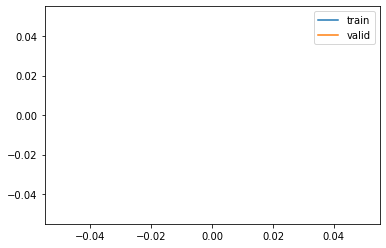

In [10]:
learn.recorder.plot_loss()

In [ ]:
learn.lr_find(stop_div=False, num_it=200)

SuggestedLRs(lr_min=5.248074739938602e-06, lr_steep=1.0964781722577754e-06)

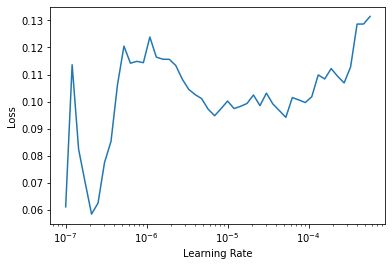

In [11]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(4, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.093576,0.225633,0.922794,01:38
1,0.090328,0.223782,0.931985,01:41
2,0.092593,0.288214,0.912684,01:38
3,0.088871,0.246584,0.925551,01:38


SuggestedLRs(lr_min=1.0964782268274575e-05, lr_steep=9.12010818865383e-07)

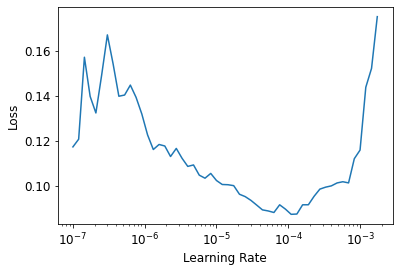

In [ ]:
learn.lr_find()

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(6, lr_max=slice(1e-7, 1e-6))

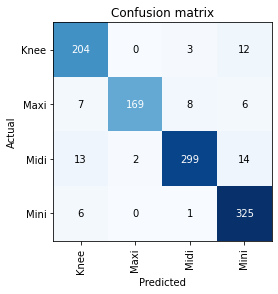

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

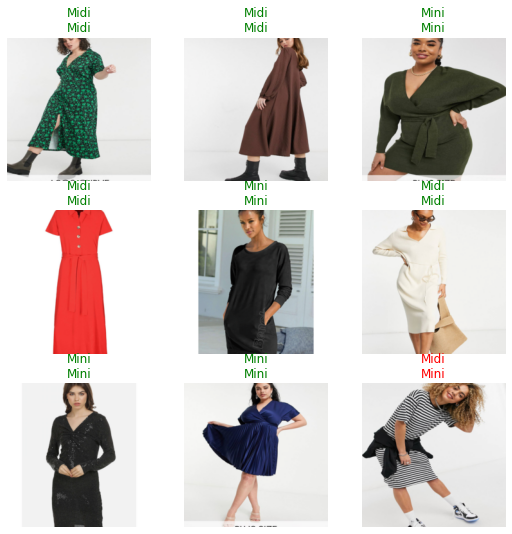

In [13]:
learn.show_results()

In [14]:
interp.plot_top_losses(100, nrows=15)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete():
  cleaner.fns[idx].unlink() 

In [ ]:

for idx,cat in cleaner.change():
  print(cleaner.fns[idx])
  shutil.move(str(cleaner.fns[idx]), path+"/"+cat)


In [15]:
learn.export('kleidlänge_classifier.pkl')

In [16]:
learn.export()

In [6]:
path = Path()
path.ls(file_exts='.pkl')

(#0) []

In [15]:
path_model='/content/drive/MyDrive/Projekt/notebooks'

In [18]:
!cp /content/kleidlänge_classifier.pkl /content/drive/MyDrive/Projekt/notebooks/kleidlänge_classifier.pkl

In [ ]:
!cp /content/drive/MyDrive/Projekt/notebooks/kleidlänge_classifier.pkl

cp: missing destination file operand after '/content/drive/MyDrive/Projekt/notebooks/Kleider_classifier.pkl'
Try 'cp --help' for more information.


In [17]:
inference = load_learner(path_model+"/"+'kleidlänge_classifier.pkl')




In [18]:
path_image = '/content/drive/MyDrive/Projekt/Bilder zum Testen /Kleid  (32).jpg'

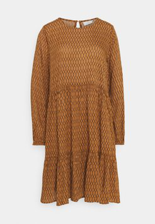

In [19]:
img = Image.open(path_image)
img.to_thumb(224,224)

In [20]:
inference.predict(path_image)

('Knee', tensor(0), tensor([9.7636e-01, 1.0475e-04, 3.3438e-04, 2.3199e-02]))

In [21]:
inference.dls.vocab

['Knee', 'Maxi', 'Midi', 'Mini']